In [1]:
using Revise, Plots, LinearAlgebra, Images

In [2]:
includet("../../src/SparseSpikes.jl")
using .SparseSpikes

Define ground truth amplitudes and positions

In [3]:
domain = [[0, 1], [0, 1]]

2-element Vector{Vector{Int64}}:
 [0, 1]
 [0, 1]

In [4]:
n_coarse_grid = 21
n_plt_grid = 64

coarse_grids = grid(domain, n_coarse_grid)
plt_grids = grid(domain, n_plt_grid)
hm_grid = grid(domain[1, :], n_plt_grid)

plot_size = (400, 400) .* 1
using Plots.Measures
plt = heatmap(xlims=domain[1], ylims=domain[2], color=:viridis, colorbar=:none, size=plot_size, grid=false, ticks=:none, margins=-2mm)
nothing

## Check $\sigma$ parameter

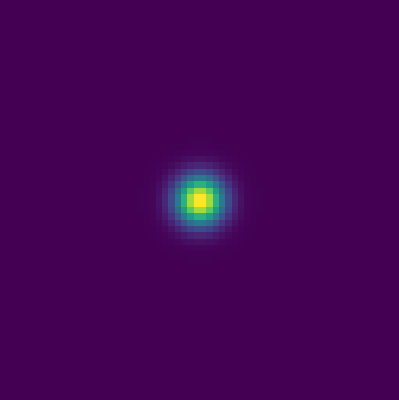

In [5]:
# const noise_mean = 0.0021172377176794793
const σ2 = let
    λ = 723.0 # Wavelength
    NA = 1.4 # Numerical aperture
    FWHM = λ / (2 * NA) # Full width at half maximum i.e. diffraction limit
    σ = FWHM / (2 * log(2.0))
    (σ / (64 * 100.0))^2
end
σ = sqrt(σ2)

ops = gaussian_operators_2D(σ, plt_grids)

plt_test_σ = deepcopy(plt)
heatmap!(plt_test_σ, hm_grid, hm_grid, ops.adjΦ(ops.Φ([0.5], [0.5], [1.0])), color=:viridis)

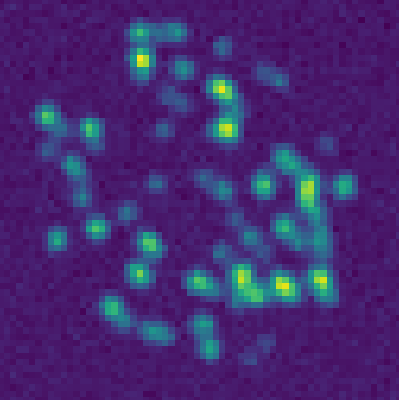

In [6]:
plt_obs = deepcopy(plt)

image = load("../../smlm/high_density_data/sequence/00001.tif")

y = channelview(image)
heatmap!(plt_obs, hm_grid, hm_grid, y', label="y_0", color=:viridis)

### SFW

In [ ]:
λ = 0.06
prob = BLASSO(vec(y), ops, domain, n_coarse_grid, λ=λ)

BLASSO(N0f16[0.00223N0f16, 0.00208N0f16, 0.0025N0f16, 0.00232N0f16, 0.0022N0f16, 0.00232N0f16, 0.00186N0f16, 0.00189N0f16, 0.00237N0f16, 0.00233N0f16  …  0.00204N0f16, 0.00177N0f16, 0.00235N0f16, 0.00198N0f16, 0.00189N0f16, 0.00192N0f16, 0.00159N0f16, 0.00229N0f16, 0.0022N0f16, 0.00209N0f16], Operators(var"#ϕ#31"{var"#gauss2D#30"{Float64, Int64, Vector{Float64}, Vector{Float64}}, Int64}(var"#gauss2D#30"{Float64, Int64, Vector{Float64}, Vector{Float64}}(590.3102629802514, 4096, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.015873015873015872, 0.031746031746031744, 0.047619047619047616, 0.06349206349206349, 0.07936507936507936, 0.09523809523809523, 0.1111111111111111, 0.12698412698412698, 0.14285714285714285  …  0.8571428571428571, 0.873015873015873, 0.8888888888888888, 0.9047619047619048, 0.9206349206349206, 0.9365079365079365, 0.9523809523809523, 0.9682539682539683, 0.9841269841269841, 1.0]), 4096, Core.Box(var"#ϕ#31"{v

In [ ]:
solve!(prob, :SFW, options=Dict(:maxits => 60))

BLASSO(N0f16[0.00223N0f16, 0.00208N0f16, 0.0025N0f16, 0.00232N0f16, 0.0022N0f16, 0.00232N0f16, 0.00186N0f16, 0.00189N0f16, 0.00237N0f16, 0.00233N0f16  …  0.00204N0f16, 0.00177N0f16, 0.00235N0f16, 0.00198N0f16, 0.00189N0f16, 0.00192N0f16, 0.00159N0f16, 0.00229N0f16, 0.0022N0f16, 0.00209N0f16], Operators(var"#ϕ#31"{var"#gauss2D#30"{Float64, Int64, Vector{Float64}, Vector{Float64}}, Int64}(var"#gauss2D#30"{Float64, Int64, Vector{Float64}, Vector{Float64}}(590.3102629802514, 4096, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.015873015873015872, 0.031746031746031744, 0.047619047619047616, 0.06349206349206349, 0.07936507936507936, 0.09523809523809523, 0.1111111111111111, 0.12698412698412698, 0.14285714285714285  …  0.8571428571428571, 0.873015873015873, 0.8888888888888888, 0.9047619047619048, 0.9206349206349206, 0.9365079365079365, 0.9523809523809523, 0.9682539682539683, 0.9841269841269841, 1.0]), 4096, Core.Box(var"#ϕ#31"{v

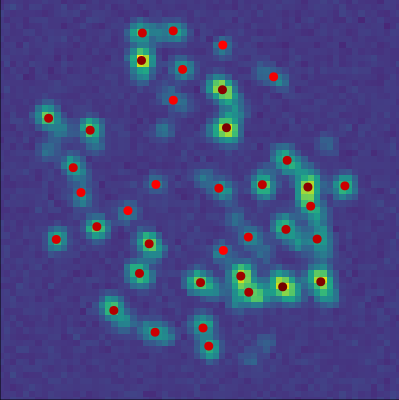

In [78]:
plt_sfw = deepcopy(plt_obs)
plot_spikes!(plt_sfw, prob.μ, colorscheme=get_cmap(:red_black))

## Random frame

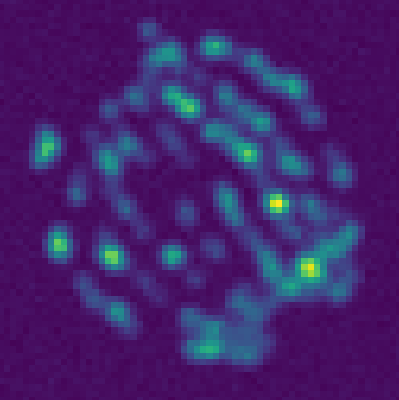

In [104]:
image = load("../../smlm/high_density_data/sequence/00267.tif")

y = channelview(image)
heatmap!(plt_obs, hm_grid, hm_grid, y', label="y_0", color=:viridis)

In [106]:
λ = 0.06
prob = BLASSO(vec(y), ops, domain, n_coarse_grid, λ=λ)
solve!(prob, :SFW, options=Dict(:maxits => 60))

SFW iterations:  57    Time: 0:18:30

BLASSO(N0f16[0.00209N0f16, 0.00203N0f16, 0.00211N0f16, 0.00198N0f16, 0.00244N0f16, 0.00174N0f16, 0.00214N0f16, 0.00217N0f16, 0.00229N0f16, 0.00237N0f16  …  0.00206N0f16, 0.00237N0f16, 0.00197N0f16, 0.00197N0f16, 0.002N0f16, 0.00212N0f16, 0.00218N0f16, 0.00235N0f16, 0.00221N0f16, 0.00203N0f16], Operators(var"#ϕ#31"{var"#gauss2D#30"{Float64, Int64, Vector{Float64}, Vector{Float64}}, Int64}(var"#gauss2D#30"{Float64, Int64, Vector{Float64}, Vector{Float64}}(590.3102629802514, 4096, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.015873015873015872, 0.031746031746031744, 0.047619047619047616, 0.06349206349206349, 0.07936507936507936, 0.09523809523809523, 0.1111111111111111, 0.12698412698412698, 0.14285714285714285  …  0.8571428571428571, 0.873015873015873, 0.8888888888888888, 0.9047619047619048, 0.9206349206349206, 0.9365079365079365, 0.9523809523809523, 0.9682539682539683, 0.9841269841269841, 1.0]), 4096, Core.Box(var"#ϕ#31"{

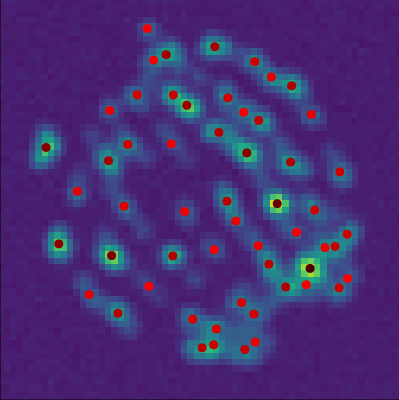

In [107]:
plt_sfw = deepcopy(plt_obs)
plot_spikes!(plt_sfw, prob.μ, colorscheme=get_cmap(:red_black))

In [111]:
savefig(plt_sfw, "../../figures/smlm/smlm_typical_frame_high.svg")

"c:\\Users\\ladis\\My Drive\\Documents\\Warwick\\Year 4\\Super resolution\\Codes\\SparseSpikes\\figures\\smlm\\smlm_typical_frame_high.svg"